# * Визуализируйте динамику продаж напитков в ParentCategory. Есть ли эффект сезонности в продаж?
# * Исследуйте и покажите на графике как отличаются продажи в будние и выходные в категориях 'Сокосодержащие напитки, смузи' и "Печенье"  ?
# * Визуализируйте структуру продаж ParentCategory по показателю GMV за один месяц. Укажите категорию с наибольшей долей GMV.
# * Исследуйте взаимосвясь между продажами категорий 'Чипсы, снеки, попкорн' и напитками:'Вода', 'Газированные напитки',  'Соки, нектары', 'Лимонады', 'Безалкогольное пиво', 'Вино', 'Пиво'. С чем сильнее коррелируют 'Чипсы, снеки, попкорн'?


# * Визуализируйте динамику продаж напитков в ParentCategory. Есть ли эффект сезонности в продаж?

In [5]:
import ast
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
categories = pd.read_pickle('data/categories.pkl')
orders = pd.read_pickle('data/orders.pkl')
df_drinks = categories[(categories['ParentCategory'] == 'Напитки')]

In [7]:
# Сначала мы развернем DataFrame по дате
df_exploded = orders.explode('items')
df_exploded

,OrderID,UserID,OrderTime,items,Date
0,90659865,1.609460e+18,2021-01-01 03:51:42,"{'ItemID': '413736', 'price': 36.72, 'quantity...",2021-01-01
0,90659865,1.609460e+18,2021-01-01 03:51:42,"{'ItemID': '523171', 'price': 90.32, 'quantity...",2021-01-01
0,90659865,1.609460e+18,2021-01-01 03:51:42,"{'ItemID': '452831', 'price': 223.11, 'quantit...",2021-01-01
0,90659865,1.609460e+18,2021-01-01 03:51:42,"{'ItemID': '303673', 'price': 59.9, 'quantity'...",2021-01-01
0,90659865,1.609460e+18,2021-01-01 03:51:42,"{'ItemID': '318193', 'price': 319.91, 'quantit...",2021-01-01
...,...,...,...,...,...
40374,93266815,1.620119e+18,2021-06-30 23:58:09,"{'ItemID': '439036', 'price': 17.5, 'quantity'...",2021-06-30
40374,93266815,1.620119e+18,2021-06-30 23:58:09,"{'ItemID': '303765', 'price': 6.56000000000000...",2021-06-30
40374,93266815,1.620119e+18,2021-06-30 23:58:09,"{'ItemID': '341794', 'price': 69.9, 'quantity'...",2021-06-30
40374,93266815,1.620119e+18,2021-06-30 23:58:09,"{'ItemID': '307216', 'price': 2.99, 'quantity'...",2021-06-30


In [8]:
new_df = pd.json_normalize(df_exploded['items'])
new_df['Date'] = df_exploded['Date'].values

In [9]:
# Создаем новый столбец total_price
new_df['total_price'] = new_df['price'] * new_df['quantity']

In [10]:
# # Переупорядочим столбцы, если нужно
new_df = new_df[['Date', 'ItemID', 'price', 'quantity', 'total_price']]


In [11]:
# Группируем по ItemID и суммируем total_price и quantity
grouped_df = new_df.groupby('ItemID').agg({
    'total_price': 'sum',
    'quantity': 'sum',
    'Date': 'first'  # или ' '.join для объединения всех дат в строку
}).reset_index()

       ItemID  total_price  quantity        Date  \
0     1000046      3810.38       145  2021-01-04   
1     1000049       898.52        30  2021-02-15   
2     1000115       519.80         2  2021-06-12   
3     1000221       225.70         3  2021-04-07   
4     1000237        65.90         1  2021-04-11   
...       ...          ...       ...         ...   
3037   999114       376.71         3  2021-01-05   
3038   999115      1740.02        11  2021-01-05   
3039   999120        91.00         1  2021-06-24   
3040   999260        63.90         1  2021-01-27   
3041   999542      3899.60        67  2021-01-22   

                            Category ParentCategory  
0                               Вода        Напитки  
1                               Вода        Напитки  
2                               Кофе        Напитки  
3                      Соки, нектары        Напитки  
4                      Соки, нектары        Напитки  
...                              ...            ...

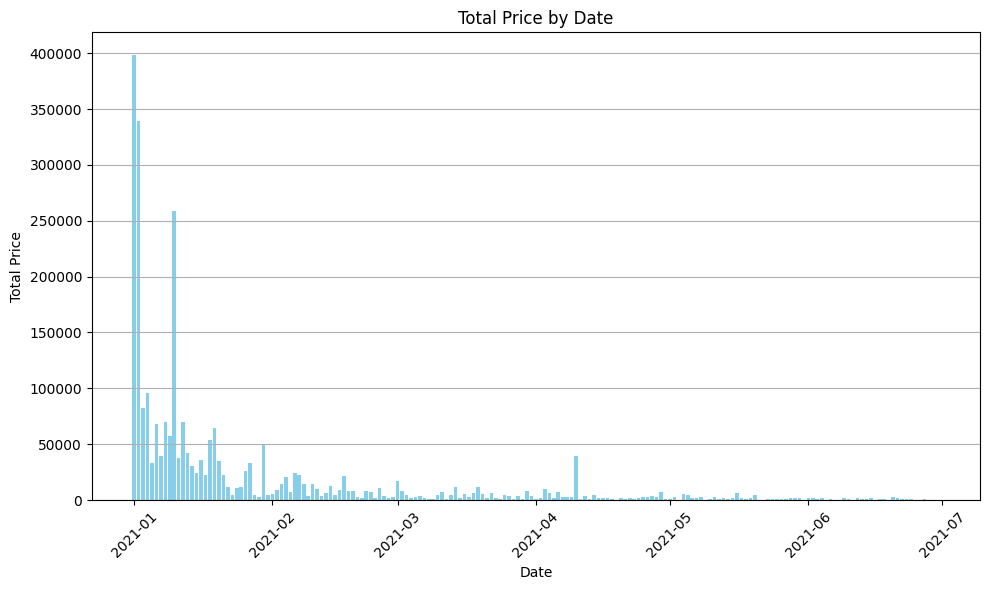

In [12]:
final_df = pd.merge(grouped_df, df_drinks, on='ItemID')
print(final_df)
# final_df.to_excel('final_df.xlsx', index=False)




# Создаем столбчатую диаграмму
plt.figure(figsize=(10, 6))
plt.bar(final_df['Date'], final_df['total_price'], color='skyblue')
plt.title('Total Price by Date')
plt.xlabel('Date')
plt.ylabel('Total Price')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()